In [1]:
from oggm import cfg, workflow, utils, shop
import pandas as pd
import os, glob
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

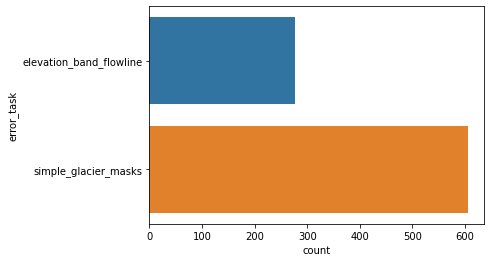

0.047120833340843195


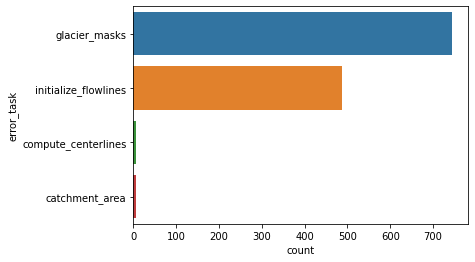

0.1152128817654677


In [2]:
border = 80

dfserr = []

for exp in ['elev_bands', 'centerlines']:

    fd = f'{exp}/RGI62/b_{border:03d}/L2/summary/'
    fs = glob.glob(fd+'*.csv')
    assert len(fs) == 19
    
    df = []
    for f in fs:
        df.append(pd.read_csv(f, index_col=0, low_memory=False))
    df = pd.concat(df).sort_index()
    
    plt.figure()
    sns.countplot(y="error_task", data=df);
    plt.show()
    
    print(df.loc[~df['error_task'].isnull()].rgi_area_km2.sum() / df.rgi_area_km2.sum() * 100)
    
    dfserr.append(df.loc[~df['error_task'].isnull()].sort_values(by='rgi_area_km2', ascending=False)[['rgi_area_km2', 'error_task', 'error_msg']].iloc[:15])

In [3]:
dfserr[0]

rgi_area_km2               error_task  \
rgi_id                                                  
RGI60-10.00002        48.144     simple_glacier_masks   
RGI60-10.00006        12.966     simple_glacier_masks   
RGI60-12.01364         9.250     simple_glacier_masks   
RGI60-19.01402         7.482  elevation_band_flowline   
RGI60-19.01367         7.271  elevation_band_flowline   
RGI60-12.01372         7.239     simple_glacier_masks   
RGI60-12.01374         7.038     simple_glacier_masks   
RGI60-10.00009         6.232     simple_glacier_masks   
RGI60-19.01305         4.820  elevation_band_flowline   
RGI60-10.00001         3.920     simple_glacier_masks   
RGI60-10.00005         3.819     simple_glacier_masks   
RGI60-19.00784         3.259  elevation_band_flowline   
RGI60-12.01500         2.916     simple_glacier_masks   
RGI60-12.01443         2.715     simple_glacier_masks   
RGI60-19.01376         2.590  elevation_band_flowline   

                                                        error_msg  
rgi_id                                                             
RGI60-10.00002  GeometryError: RGI60-10.00002 is a nominal gla...  
RGI60-10.00006  GeometryError: RGI60-10.00006 is a nominal gla...  
RGI60-12.01364  GeometryError: RGI60-12.01364 is a nominal gla...  
RGI60-19.01402  InvalidDEMError: (RGI60-19.01402) DEM altidude...  
RGI60-19.01367  InvalidDEMError: (RGI60-19.01367) DEM altidude...  
RGI60-12.01372  GeometryError: RGI60-12.01372 is a nominal gla...  
RGI60-12.01374  GeometryError: RGI60-12.01374 is a nominal gla...  
RGI60-10.00009  GeometryError: RGI60-10.00009 is a nominal gla...  
RGI60-19.01305  InvalidDEMError: (RGI60-19.01305) DEM altidude...  
RGI60-10.00001  GeometryError: RGI60-10.00001 is a nominal gla...  
RGI60-10.00005  GeometryError: RGI60-10.00005 is a nominal gla...  
RGI60-19.00784  InvalidDEMError: (RGI60-19.00784) DEM altidude...  
RGI60-12.01500  GeometryError: RGI60-12.01500 is a nominal gla...  
RGI60-12.01443  GeometryError: RGI60-12.01443 is a nominal gla...  
RGI60-19.01376  InvalidDEMError: (RGI60-19.01376) DEM altidude...

In [4]:
dfserr[1]

rgi_area_km2            error_task  \
rgi_id                                               
RGI60-19.01521        94.963  initialize_flowlines   
RGI60-10.00002        48.144         glacier_masks   
RGI60-04.06184        40.934  initialize_flowlines   
RGI60-03.04079        35.752  initialize_flowlines   
RGI60-14.01649        30.795        catchment_area   
RGI60-19.00780        25.152  initialize_flowlines   
RGI60-03.03560        19.461   compute_centerlines   
RGI60-14.16016        19.194        catchment_area   
RGI60-17.03927        16.197        catchment_area   
RGI60-10.00006        12.966         glacier_masks   
RGI60-17.02547        10.801         glacier_masks   
RGI60-17.04120        10.793        catchment_area   
RGI60-19.00496        10.599  initialize_flowlines   
RGI60-19.01431        10.440  initialize_flowlines   
RGI60-12.01364         9.250         glacier_masks   

                                                        error_msg  
rgi_id                                                             
RGI60-19.01521  RuntimeError: Altitude range of main flowline ...  
RGI60-10.00002  GeometryError: RGI60-10.00002 is a nominal gla...  
RGI60-04.06184                                   AssertionError:   
RGI60-03.04079  RuntimeError: Altitude range of main flowline ...  
RGI60-14.01649  ValueError: no minimum-cost path was found to ...  
RGI60-19.00780  RuntimeError: Altitude range of main flowline ...  
RGI60-03.03560  ValueError: no minimum-cost path was found to ...  
RGI60-14.16016  ValueError: no minimum-cost path was found to ...  
RGI60-17.03927  ValueError: no minimum-cost path was found to ...  
RGI60-10.00006  GeometryError: RGI60-10.00006 is a nominal gla...  
RGI60-17.02547  InvalidGeometryError: This glacier geometry is...  
RGI60-17.04120  ValueError: no minimum-cost path was found to ...  
RGI60-19.00496  RuntimeError: Altitude range of main flowline ...  
RGI60-19.01431  RuntimeError: Altitude range of main flowline ...  
RGI60-12.01364  GeometryError: RGI60-12.01364 is a nominal gla...